In [1]:
#Instalation de openBBB
#!pip install openbb

In [2]:
#Import libraries
import pandas as pd
from openbb import obb

In [3]:
# Login si besoin de se connecter a son compte openBB pour avoir acces a ses tokens de data providers
#obb_Token = ''
#obb.account.login(pat=obb_Token)

---

In [4]:
# Data Acquisition Parameters
interval = '1d'
start_date='2024-01-01'
end_date='2024-07-01'

# Set Dataframe type as output
obb.user.preferences.output_type = "dataframe"

---
Crypto

In [5]:
# Get Data from OBB
df_crypto = obb.crypto.price.historical(symbol = "btc-usd", start_date=start_date, end_date=end_date, interval=interval, provider="yfinance")
df_crypto.head()

,open,high,low,close,volume
date,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,1.842698e+10
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,3.933527e+10
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,4.634232e+10
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,3.044809e+10
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,3.233603e+10


<Axes: xlabel='date'>

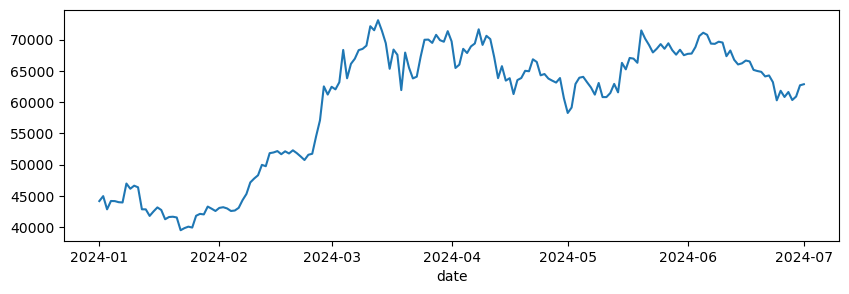

In [6]:
df_crypto.close.plot(figsize=(10,3))

---
Actions / Indices

In [7]:
df_stocks = obb.equity.price.historical(symbol = "aapl", start_date=start_date, end_date=end_date, interval=interval, provider="yfinance")
df_stocks.head()

,open,high,low,close,volume,split_ratio,dividend
date,,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,82488700,0.0,0.0
2024-01-03,184.220001,185.880005,183.429993,184.250000,58414500,0.0,0.0
2024-01-04,182.149994,183.089996,180.880005,181.910004,71983600,0.0,0.0
2024-01-05,181.990005,182.759995,180.169998,181.179993,62303300,0.0,0.0
2024-01-08,182.089996,185.600006,181.500000,185.559998,59144500,0.0,0.0


<Axes: xlabel='date'>

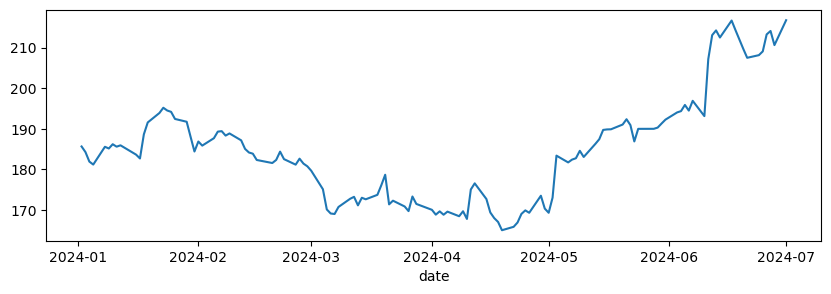

In [8]:
df_stocks.close.plot(figsize=(10,3))

---
Forex

In [9]:
df_forex = obb.currency.price.historical(symbol ="USDEUR", start_date=start_date, end_date=end_date, interval=interval, provider="yfinance")
df_forex.head()

,open,high,low,close,volume
date,,,,,
2024-01-01,0.90450,0.90580,0.904700,0.90450,0.0
2024-01-02,0.90590,0.91391,0.905300,0.90590,0.0
2024-01-03,0.91393,0.91754,0.911826,0.91393,0.0
2024-01-04,0.91510,0.91600,0.911560,0.91510,0.0
2024-01-05,0.91346,0.91913,0.909390,0.91346,0.0


<Axes: xlabel='date'>

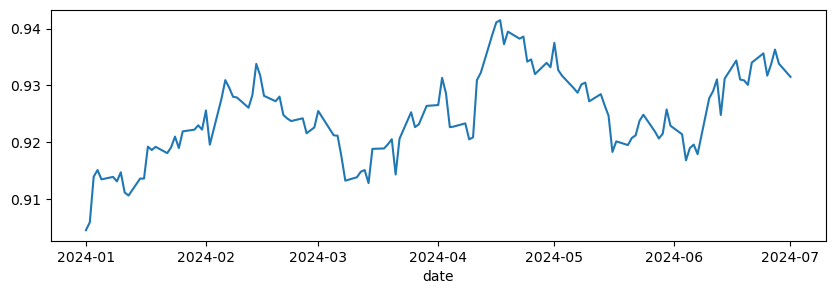

In [10]:
df_forex.close.plot(figsize=(10,3))

---
Resampling des données
- Si besoin d'une unité de temps spécifique qui n'est pas disponible chez le data vendor

In [11]:
def resample(df, interval):
    # Check if the index is a DateTimeIndex, and if not, set it as DateTimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    
    # Resample the dataframe OHLCV data
    df = df.resample(interval).agg({
        'open': 'first', 
        'high': 'max', 
        'low': 'min', 
        'close': 'last', 
        'volume': 'sum'
    })
    
    return df

In [12]:
# Resampling 1d to 3d
df_resampled = resample(df_crypto, '3d')

In [13]:
df_resampled.head()

,open,high,low,close,volume
date,,,,,
2024-01-01,42280.234375,45899.707031,40813.535156,42848.175781,1.041046e+11
2024-01-04,42855.816406,44770.023438,42675.175781,43989.195312,7.887662e+10
2024-01-07,43998.464844,47893.699219,43244.082031,46139.730469,1.018981e+11
2024-01-10,46121.539062,48969.371094,41903.769531,42853.167969,1.392810e+11
2024-01-13,42799.445312,43319.722656,41705.417969,42511.968750,6.044351e+10


---
Sauvegarde des données :


- CSV : Pour les données de petite à petite à moyenne taille.
- Pickle : Pour les données de moyenne taille.
- HDF5 : Pour les données de moyenne à grande taille.

In [14]:
#1. Save to csv
df_resampled.to_csv('data.csv')

#2. Save to Pickle
#df_resampled.to_pickle('data.pkl')

#3. Save using HDF5
#df_resampled.to_hdf('data.h5', key='ohlcv', mode='w')